# Lab 4: Classification

In this introduction to classification we will aim to understand how to apply classification algorithms to our datasets. 
Identifying the labels and values in order to predict classification targets. We will take a standard UCI dataset and look at how to split it into a train and test dataset.

Initially we will consider simple classification of datasets.
We will move on to consider how we can perform some pre-processing on our datasets to make classification more effective. 
We will then finish with looking at how we can measure the performance of our algorithms. 
Does classification accuracy tell the whole story?


## Loading the data

In this example we are using one of the built in UCR datasets (`Iris`).

In [18]:
#here i am using the built in datasets in sklearn.
#from sklearn import datasets

#make the plots bigger
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

#load the iris datasets
#iris = datasets.load_iris(as_frame=True)
#X = iris.data   #setup the tabular data
#y = iris.target #setup the labels

import pandas as pd
import numpy as np

iris = pd.read_csv("../../Datasets/Iris.csv")

X = iris[["sepal_length", "petal_length", "petal_width"]]
y = iris["species"]
print(X)
print(y)


     sepal_length  petal_length  petal_width
0             5.1           1.4          0.2
1             4.9           1.4          0.2
2             4.7           1.3          0.2
3             4.6           1.5          0.2
4             5.0           1.4          0.2
..            ...           ...          ...
145           6.7           5.2          2.3
146           6.3           5.0          1.9
147           6.5           5.2          2.0
148           6.2           5.4          2.3
149           5.9           5.1          1.8

[150 rows x 3 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


# Train and Test Split

When creating a classification problem we need a set of data, and an associated set of labels. 
In the case of the iris datasets we have properties of the flower, and the associated species as the label. 

In order to learn about the data we need split our dataset into a train and test split. 
The reason for doing this is because we want to learn from a set of data for which we have labels, and then measure our models effectiveness against unseen test data, for which we do have the labels. 

Here we use the sklearn function `train_test_split` to create a train and test datasets for both the data and the labels. Setting `test_size=0.2` the test set (`X_test`) will be 20% of the samples in the dataset (`X`) and the train set (`X_train`) will contain 80% of the samples. 

Consider how different train and test set sizes might affect the accuracy of a classifier. Is accuracy the best measure of model performance?

To start on classificatin we may have to encode the actual target variable or label.  For that we can use the `label Encoder` from sklearn.  


In [19]:
from sklearn.preprocessing import LabelEncoder

#encode the labels from strings to values.
le = LabelEncoder()

y = le.fit_transform(y)
print(le.classes_)
y

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Now we create the train/test split for modelling. 

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Pre-Processing

Before we feed the dataset to the classifier, we can perform some pre processing stages to our dataset. You should have looked at various pre-processing steps in the previous lab. 

When performing pre-processing to data that is going to be fed into a classifier, or other model that needs fitting, care must be taken.

In this example I perform `L2` normalisation on the train and test set <b>together</b>. This is important in the case of normalisation because when we calculate the mean and standard deviation for the dataset, if we normalised the dataset as a continuous block we would get potentially different values for each sample, when compared with normalising together. Additionally, It's important to normalise the test data using the mean and standard deviation of the train so that the normalisation is <b>consistent</b> but doesn't introduce bias from looking at the train data. Hence the model for normalisation is obtained from the train data but then applied to the test data.


In [21]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)


# Classification

Here we can select the classifier to use. we show 3 simple classifiers that are commonly used in classification (there are MANY more).
In the first cell we sue a 2NN classifier, this is by setting `n_neighbours=2`. 
In the second cell we use a Support Vector Classifier with a order 3 polynomial kernel `kernel='poly'` and `degree=3`, the decision boundary will take the form:
 $$f(x) = ax^3 + bx^2 + cx + d$$

In the third cell we use a Decision Tree Classifier, where we use Entropy for the information gain (`criterion='entropy'`) to determine the splitting criteria. 

In SKLearn most classifiers are created as an object, the parameters for which are entered via the constructor, and then we have two commons functions available, the first being fit and the second being `predict` and `predict_proba`.

The fit function, is where we input the train data and labels into the classifier. 
The `predict` and `predict_proba` function is where we can input our test data to receive label predictions, or a vector of probabilities for each sample, where the prediction is the argmax of the probabilities.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

clf_nn = KNeighborsClassifier(n_neighbors=2)

In [23]:
from sklearn.svm import SVC

clf_svm = SVC(kernel='poly', degree=3)

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy')

In [25]:
clf = clf_tree

## Fit the data to the model

Here we call the fit function as discussed earlier, passing in the train data and the train labels. In this case we are fitting the decision tree as that was instantiated in the previous cell.

In [26]:
clf.fit(X_train,y_train);

DecisionTreeClassifier is capable of both binary classification and multiclass classification. 
Using the iris dataset we have trained our tree, and we can plot what that tree looks like using the `tree` Module in sklearn.  In particular there is a method `plot_tree` for visualising the model. Spend some time trying to understand what the model visualisation is telling us about how decisions are made. 

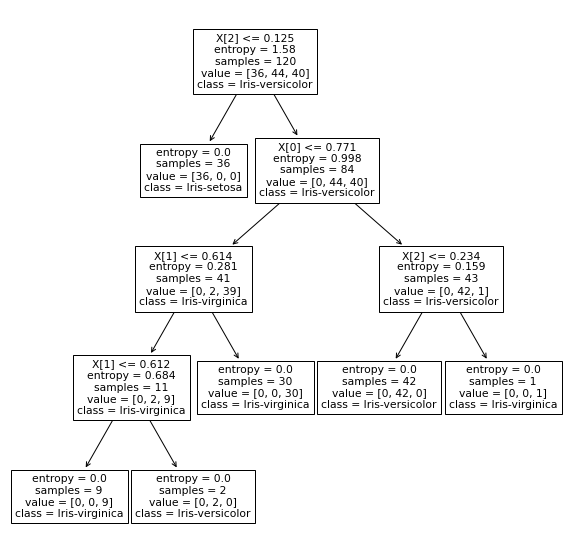

In [27]:
from sklearn import tree
tree_plot = tree.plot_tree(clf_tree, class_names=le.classes_)

# Prediction

Here we call the predict function as dicussed earlier, passing in the test data, and <b>NO</b> labels.  What we get is a set of _predited_ labels, given the model we created. 

In [28]:
y_hat = clf.predict(X_test)
y_hat

array([0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 2, 0, 1, 2])

# Scoring

Accuracy is the simplest measure of performance we can consider for a classification model. 
We calculate the percentage of correctly predicted labels.  In the next week's lab sheet will consider more complex performance measures.

We start using the `accuracy` method in _sklearn_ but we also look at how we may calculate the same manually so we can understand what accuracy is.  


In [29]:
from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy = accuracy_score(y_test, y_hat)
print('Sklearn calculated accuracy:',accuracy)

#We coould implement our own accuracy.
#find the indices where the predicted and the actual match
counts, = np.where(y_hat==y_test)

print('Number of data points in test data:',len(y_test))
print('Number of data points where prediction is correct:',len(counts))

manual_accuracy = len(counts) / len(y_test)

print('Manual accuracy:',manual_accuracy)
print(counts)
print('Prediction', y_hat)
print('Actual    ',y_test)



Sklearn calculated accuracy: 0.9
Number of data points in test data: 30
Number of data points where prediction is correct: 27
Manual accuracy: 0.9
[ 0  1  2  3  4  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 27 28 29]
Prediction [0 2 1 0 0 2 2 2 0 2 2 2 2 0 2 0 0 0 0 1 0 0 2 2 0 0 2 0 1 2]
Actual     [0 2 1 0 0 1 2 2 0 2 1 2 2 0 2 0 0 0 0 1 0 0 2 2 0 0 1 0 1 2]


Now the next important thing in understanding classification is visualising the erros through use of a _confusion matrix_.  We import this from _sklearn_.  The confusion matrix shows us the predicted against the actual so we can see errors for each class and correct predictions.  Take some time to understand the confusion matrix. The diagonal shows the correct predictions where actual and predicted coincide, whereas off-diagonal we wee the errors in prediction.  Below we can see that the model performs badly as it predicts some class 2 instances (Iris Virginica) as class 1 (Iris Versicolor).

## Comparing Classifiers

Often we want to compare classifiers scores to see and rank how each performed on the same dataset.
This is one way we could choose the best algorithm for the problem, as no one algorithm is better than the rest on all problems (No free lunch theorem)

In [30]:

#bundle up the classifiers
clfs = [clf_nn, clf_svm, clf_tree]

#fit the classifiers with the data
for clf in clfs:
    clf.fit(X_train, y_train)

#get the predictions for each classifier
clf_preds = [clf.predict(X_test) for clf in clfs]

#get the accuracy score for each classifer
accs = [accuracy_score(y_test, clf_p) for clf_p in clf_preds]

#get the index of the best accuracy
index = np.argmax(accs)

print("best classifier is:", clfs[index], " with an accuracy of: ", accs[index])
np.sort(accs)


best classifier is: KNeighborsClassifier(n_neighbors=2)  with an accuracy of:  0.9


array([0.9, 0.9, 0.9])

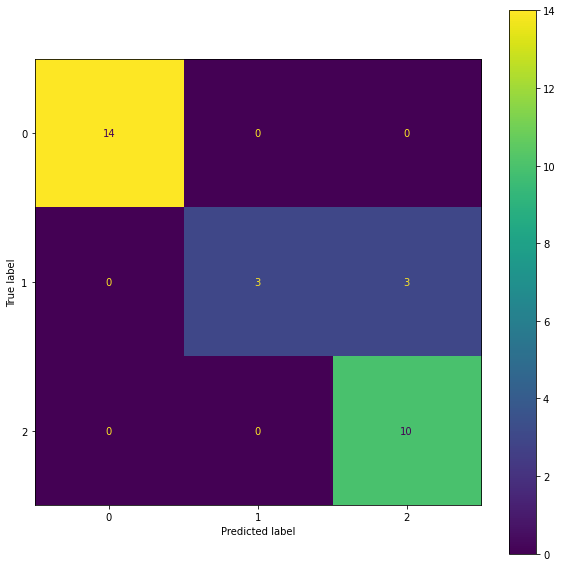

In [31]:
#Making the Confusion Matrix

from sklearn.metrics import confusion_matrix

#we can get the confusion matrix
cm = confusion_matrix(y_test, y_hat)

#we can plot it
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)


# K-Fold Cross Validation for parameter tuning

Sometimes we have multiple options for the parameters for our models.
We may wish to tune these parameters. If we select parameters based on the test data, this is considered "cheating", as we have looked the anwers and fit our data to them to maximise some score.

In practice what we want to do, when picking and tuning our parameters, is to validate on some unseen data (but not use the test data).  We can do that by using cross-validation, so that we create a number of "internal" partitions of the data and each time we train on some of the partitions and use one for testing. We can repeat this over different partitions to get more robust evaluation.

We then try to maximise (or minimise) our scoring (often accuracy) function to pick the parameter which produced the best result.


In [32]:
criterion_parameter = ["entropy", "gini"]

#import our KFold cross validation object.
from sklearn.model_selection import KFold

#we want one split for each parameter option
kf = KFold(n_splits=(len(criterion_parameter)))

accuracies = []
for index, (train_index, test_index) in enumerate(kf.split(X_train)):
    #build classifier with our current parameter.
    clf_tree_cv = DecisionTreeClassifier(criterion=criterion_parameter[index])
    #extract the cross vadlidated data into train and test datasets
    X_train_cv, y_train_cv = X_train[train_index], y_train[train_index]
    X_test_cv, y_test_cv = X_train[test_index], y_train[test_index]
    
    #fit our parameterised model to the cross-validated data.
    clf_tree_cv.fit(X_train_cv, y_train_cv)

    #obtain predictions on the cv test set.
    y_hat_cv = clf_tree_cv.predict(X_test_cv)

    #append the accuracies to the list of all of them.
    accuracies.append(accuracy_score(y_test_cv, y_hat_cv))
    print('Criterion:',criterion_parameter[index], '\ Accuracy:',accuracies[index])

#print(accuracies)
import numpy as np
# pick the best parameter
best_paramater = criterion_parameter[np.argmax(accuracies)]
print('Best parameter is:',best_paramater)

# train the classifier using the best parameter and the whole train set.
tuned_clf = DecisionTreeClassifier(criterion=best_paramater)
tuned_clf.fit(X_train, y_train)

# evaluate the accuracy using the unseen test data.
score = accuracy_score(y_test, tuned_clf.predict(X_test))
print('Accuracy on unseen test data:',score)

Criterion: entropy \ Accuracy: 1.0
Criterion: gini \ Accuracy: 1.0
Best parameter is: entropy
Accuracy on unseen test data: 0.9


####  K-Fold Things to Remember

When training and fitting our parameters we must remember to never use the test data. We may apply a similar approach to choosing pre-processing strategies via cross-validation.  

## Modelling using the KNN algorithm

Now we can repeat the same exercise but this time we apply our second algorith, the `KNeighborsClassifier`.  We generate the accuracy and the confusion matrix.  

Sklearn calculated accuracy: 0.9


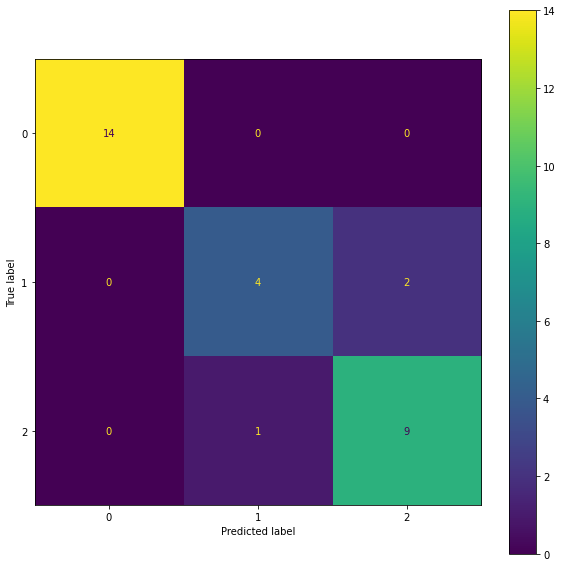

In [33]:
clf = clf_nn
clf.fit(X_train,y_train);
y_hat = clf.predict(X_test)
y_hat
#we can use the built in accuracy metrics in sklearn.
accuracy = accuracy_score(y_test, y_hat)
print('Sklearn calculated accuracy:',accuracy)

#we can get the confusion matrix
cm = confusion_matrix(y_test, y_hat)

#we can plot it
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)


We can  experiment with the number of neighbours as a parameter of the `KNeighborsClassifier` algorithm.  Let us try neighbours from 2 to 9 to understand which gives us the best performance. 

In [34]:
from sklearn.tree import DecisionTreeClassifier
#in the case of decision trees, we have to options for selecting our splitting criterion method
#the first is entropy and the second is Gini impurity.
# we could just use the default of entropy, but what if gini was better?
criterion_parameter = [2,3,4,5,6,7,8,9]

#import our KFold cross validation object.
from sklearn.model_selection import KFold

#we want one split for each parameter option
kf = KFold(n_splits=(len(criterion_parameter)))

accuracies = []
for index, (train_index, test_index) in enumerate(kf.split(X_train)):
    #build classifier with our current parameter.
    clf_knn_cv = KNeighborsClassifier(n_neighbors=criterion_parameter[index])
    #extract the cross vadlidated data into train and test datasets
    X_train_cv, y_train_cv = X_train[train_index], y_train[train_index]
    X_test_cv, y_test_cv = X_train[test_index], y_train[test_index]
    
    #fit our parameterised model to the cross-validated data.
    clf_knn_cv.fit(X_train_cv, y_train_cv)

    #obtain predictions on the cv test set.
    y_hat_cv = clf_knn_cv.predict(X_test_cv)

    #append the accuracies to the list of all of them.
    accuracies.append(accuracy_score(y_test_cv, y_hat_cv))
    print('Criterion:',criterion_parameter[index], '\ Accuracy:',accuracies[index])

#print(accuracies)
import numpy as np
# pick the best parameter
best_paramater = criterion_parameter[np.argmax(accuracies)]
print('Best parameter is:',best_paramater)

# train the classifier using the best parameter and the whole train set.
tuned_clf = KNeighborsClassifier(n_neighbors=best_paramater)
tuned_clf.fit(X_train, y_train)

# evaluate the accuracy using the unseen test data.
score = accuracy_score(y_test, tuned_clf.predict(X_test))
print('Accuracy on unseen test data:',score)


Criterion: 2 \ Accuracy: 1.0
Criterion: 3 \ Accuracy: 0.9809523809523809
Criterion: 4 \ Accuracy: 0.9904761904761905
Criterion: 5 \ Accuracy: 0.9809523809523809
Criterion: 6 \ Accuracy: 0.9904761904761905
Criterion: 7 \ Accuracy: 0.9809523809523809
Criterion: 8 \ Accuracy: 0.9714285714285714
Criterion: 9 \ Accuracy: 0.9809523809523809
Best parameter is: 2
Accuracy on unseen test data: 0.9


Before you finish here, you can try to run the `SVC` kernel from earlier and find some parameters you could experiment with. 

##  Learning outcomes
- We have learned about creating train and test partititions
- We have used a new preprocessing technique, normalistion
- We have looked at three different models
- We have evaluated those models using accuracy as the scoring function
- We have looked at confusion matrices
- We have done some parameter experimentation

